<a href="https://colab.research.google.com/github/wesleykieu/machine-learning-portfolio/blob/main/cifar10_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Download the CIFAR-10 dataset
!wget -O cifar-10-python.tar.gz https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

--2025-10-20 07:22:49--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  46.1MB/s    in 3.9s    

2025-10-20 07:22:53 (41.2 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]



In [2]:
# Extract the dataset
!tar -xzf cifar-10-python.tar.gz

# Task
Load the CIFAR-10 dataset and display some images.

## Load the data

### Subtask:
Load the CIFAR-10 dataset from the extracted files.


**Reasoning**:
Define a function to load a single data batch file and then use it to load all the data and meta files.



In [3]:
import pickle
import numpy as np
import os

def load_cifar_batch(file_path):
    """Loads a single CIFAR-10 batch file."""
    with open(file_path, 'rb') as f:
        batch_dict = pickle.load(f, encoding='bytes')
    data = batch_dict[b'data']
    labels = batch_dict[b'labels']
    return data, labels

# Define the directory where the dataset is extracted
cifar10_dir = 'cifar-10-batches-py'

# Load training batches
train_data = []
train_labels = []
for i in range(1, 6):
    batch_file = os.path.join(cifar10_dir, f'data_batch_{i}')
    data, labels = load_cifar_batch(batch_file)
    train_data.append(data)
    train_labels.append(labels)

# Concatenate training data and labels
train_data = np.concatenate(train_data)
train_labels = np.concatenate(train_labels)

# Load test batch
test_batch_file = os.path.join(cifar10_dir, 'test_batch')
test_data, test_labels = load_cifar_batch(test_batch_file)
test_labels = np.array(test_labels)

# Normalize the data
train_data = train_data.astype('float32') / 255.0
test_data = test_data.astype('float32') / 255.0

# Load class names
meta_file = os.path.join(cifar10_dir, 'batches.meta')
with open(meta_file, 'rb') as f:
    meta_dict = pickle.load(f, encoding='bytes')
    class_names = [name.decode('utf-8') for name in meta_dict[b'label_names']]

print("CIFAR-10 dataset loaded successfully.")
print(f"Training data shape: {train_data.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Test data shape: {test_data.shape}")
print(f"Test labels shape: {test_labels.shape}")
print(f"Training data range: [{train_data.min()}, {train_data.max()}]")
print(f"Class names: {class_names}")

CIFAR-10 dataset loaded successfully.
Training data shape: (50000, 3072)
Training labels shape: (50000,)
Test data shape: (10000, 3072)
Test labels shape: (10000,)
Training data range: [0.0, 1.0]
Class names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [4]:
num_classes = 10

# Create one-hot encoded labels
train_labels_onehot = np.zeros((len(train_labels), num_classes))
train_labels_onehot[np.arange(len(train_labels)), train_labels] = 1

test_labels_onehot = np.zeros((len(test_labels), num_classes))
test_labels_onehot[np.arange(len(test_labels)), test_labels] = 1

print("Labels one-hot encoded successfully.")
print(f"Original train label example: {train_labels[0]}")
print(f"One-hot train label example: {train_labels_onehot[0]}")
print(f"Train labels one-hot shape: {train_labels_onehot.shape}")
print(f"Test labels one-hot shape: {test_labels_onehot.shape}")

Labels one-hot encoded successfully.
Original train label example: 6
One-hot train label example: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Train labels one-hot shape: (50000, 10)
Test labels one-hot shape: (10000, 10)


In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [6]:
# Reshape data for CNN (height, width, channels)
train_data = train_data.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
test_data = test_data.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)

print(f"Reshaped training data: {train_data.shape}")  # Should be (50000, 32, 32, 3)
print(f"Reshaped test data: {test_data.shape}")      # Should be (10000, 32, 32, 3)

Reshaped training data: (50000, 32, 32, 3)
Reshaped test data: (10000, 32, 32, 3)


In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.MaxPool2D((2,2)))

# Flatten -> ReLU
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))

# Softmax
model.add(layers.Dense(10, activation='softmax'))

In [8]:
model.summary(0)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
callbacks = [
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

In [18]:
history = model.fit(
    train_data,
    train_labels_onehot,
    epochs=10,
    batch_size=64,
    validation_split=0.1,
    callbacks=callbacks
)

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.3507 - loss: 1.7731 - val_accuracy: 0.5498 - val_loss: 1.3312
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5481 - loss: 1.2748 - val_accuracy: 0.5768 - val_loss: 1.2223
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6112 - loss: 1.1118 - val_accuracy: 0.6428 - val_loss: 1.0555
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6467 - loss: 1.0101 - val_accuracy: 0.6448 - val_loss: 1.0327
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6729 - loss: 0.9407 - val_accuracy: 0.6636 - val_loss: 1.0009
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6907 - loss: 0.8935 - val_accuracy: 0.6916 - val_loss: 0.9235
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7028 - loss: 0.8570 - val_accuracy: 0.6950 - val_loss: 0.9033
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7229 - loss: 0.8008 - val_accuracy: 0.

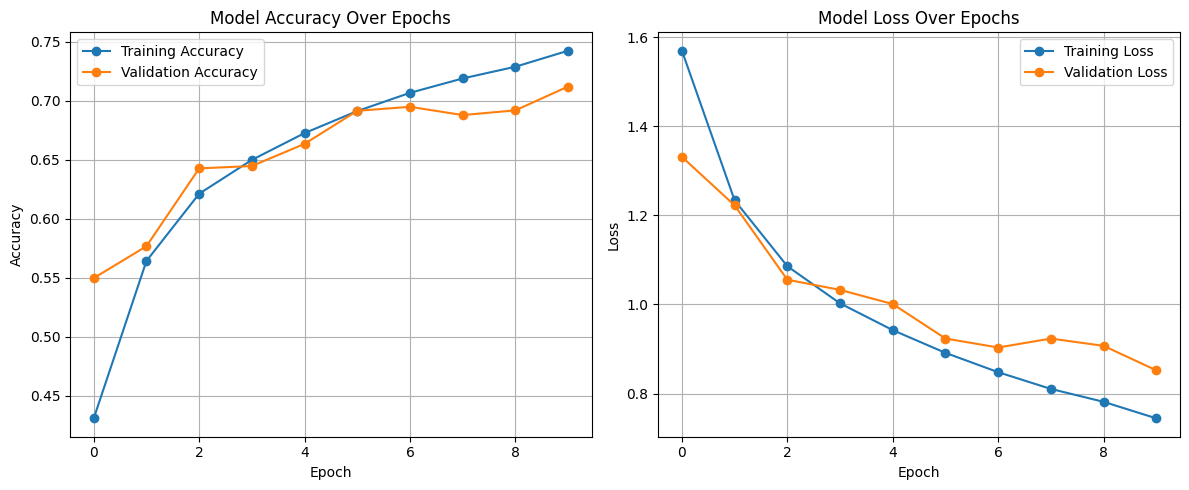

Final Training Accuracy: 0.7426
Final Validation Accuracy: 0.7122
Final Training Loss: 0.7444
Final Validation Loss: 0.8522


In [19]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Print final metrics
print(f"Final Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"Final Training Loss: {history.history['loss'][-1]:.4f}")
print(f"Final Validation Loss: {history.history['val_loss'][-1]:.4f}")